In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("Automobile_price_data_Raw.csv")
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500,18,22,17450.0


In [2]:
def read_auto_data(data):
    'Function to load the auto price data set from a .csv file' 

    ## Read the .csv file with the pandas read_csv method
    auto_prices = data
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
        
    return auto_prices
auto_prices = read_auto_data(data)

/Users/atpathak/opt/miniconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [3]:
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0


In [4]:
auto_prices.columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price']
auto_prices.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0


In [5]:
(auto_prices.astype(np.object) == '?').any()

symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_of_doors         False
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                 False
stroke               False
compression_ratio    False
horsepower           False
peak_rpm             False
city_mpg             False
highway_mpg          False
price                False
dtype: bool

In [6]:
for col in auto_prices.columns:
    if auto_prices[col].dtype == object:
        count = 0
        count = [count + 1 for x in auto_prices[col] if x== "?"]
        print(col + ' ' + str(sum(count)))

normalized_losses 34
make 0
fuel_type 0
aspiration 0
num_of_doors 0
body_style 0
drive_wheels 0
engine_location 0
engine_type 0
num_of_cylinders 0
fuel_system 0


In [7]:
auto_prices.drop('normalized_losses', axis = 1, inplace= True)

In [8]:
auto_prices.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0


In [9]:
auto_prices['body_style'].value_counts()

sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [10]:
body_categories = {'hardtop':'hardtop_convertible', 'convertible':'hardtop_convertible', 
                       'sedan':'sedan', 'hatchback': 'hatchback', 
                       'wagon':'wagon'}
auto_prices['body_style'] = [body_categories[x] for x in auto_prices['body_style']]
auto_prices['body_style'].value_counts()

sedan                  92
hatchback              63
wagon                  24
hardtop_convertible    14
Name: body_style, dtype: int64

In [11]:
from sklearn import preprocessing
print(auto_prices['body_style'].unique())
Features = auto_prices['body_style']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['hardtop_convertible' 'hatchback' 'sedan' 'wagon']
[0 0 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 2 2 3 1 1 1 1 1 1 2 3 1 1
 2 2 2 2 2 1 2 2 2 1 1 1 2 2 1 2 1 2 1 2 2 2 3 0 2 2 0 2 0 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 3 2 1 2 3 0 1 2 2 3 2 1 1 1 2 2 3 3 2 2 3 3 2 2 2 1 1
 1 2 2 3 1 1 0 0 0 1 2 1 2 1 2 1 1 1 2 2 2 2 2 3 3 3 3 1 1 1 3 3 3 2 1 2 1
 2 1 2 2 1 2 1 0 0 1 0 1 0 2 2 1 2 1 1 1 2 3 2 2 2 2 2 2 2 0 1 2 2 3 2 3 2
 3 2 3 2 2 2 2 2]


In [12]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]
#Features.shape

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [36]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()

categorical_columns = ['fuel_type', 'aspiration', 'drive_wheels', 'num_of_cylinders']

for col in categorical_columns:
    temp = encode_string(auto_prices[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])

(193, 14)
[[1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]]


In [37]:
Features = np.concatenate([Features, np.array(auto_prices[['curb_weight', 'horsepower', 'city_mpg']])], axis = 1)
Features[:2,:]

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.548e+03, 1.110e+02, 2.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.548e+03, 1.110e+02, 2.100e+01]])

In [13]:
auto_prices['num_of_cylinders'].value_counts()

four      153
six        24
five       10
eight       4
twelve      1
three       1
Name: num_of_cylinders, dtype: int64

In [14]:
cylinders_categories = {'three':'three_four', 'four':'three_four', 
                       'five':'five_six', 'six': 'five_six', 
                       'eight':'eight_twelve', 'twelve':'eight_twelve'}
auto_prices['num_of_cylinders'] = [cylinders_categories[x] for x in auto_prices['num_of_cylinders']]
auto_prices['num_of_cylinders'].value_counts()

three_four      154
five_six         34
eight_twelve      5
Name: num_of_cylinders, dtype: int64

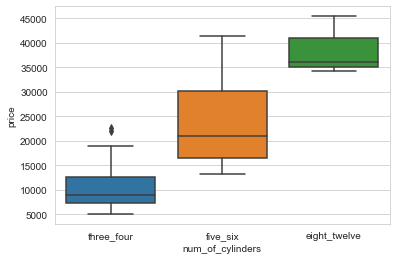

In [15]:
def plot_box(auto_prices, col, col_y = 'price'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data = auto_prices)
    plt.xlabel(col)
    plt.ylabel(col_y)
    plt.show()
plot_box(auto_prices, 'num_of_cylinders')

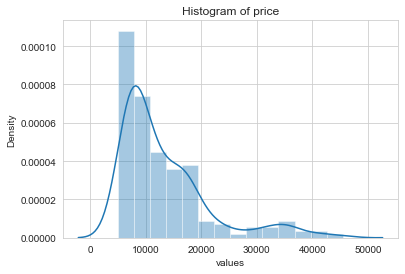

In [16]:
def hist_plot(vals, lab):
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('values')
    plt.ylabel('Density')
    
hist_plot(auto_prices['price'], 'price')

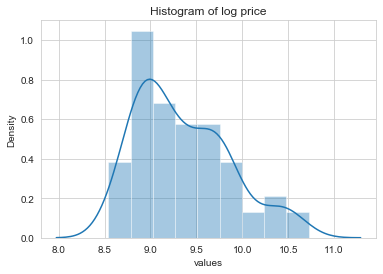

In [17]:
auto_prices['log_price'] = np.log(auto_prices['price'])
hist_plot(auto_prices['log_price'], 'log price')

In [95]:
auto_prices['log_price'].isna().sum()

0

In [38]:
import numpy.random as nr
from sklearn.model_selection import train_test_split
nr.seed(9988)
labels = np.array(auto_prices['log_price'])
#print(labels)
indx = range(Features.shape[0])
#print(indx)
indx = train_test_split(indx, test_size = 40)
#print(indx[0])
#print(auto_prices[,:])
x_train = Features[indx[0],:]
#print(x_train)
y_train = np.ravel(labels[indx[0]])
#print(y_train)
x_test = Features[indx[1],:]
#print(x_test)
y_test = np.ravel(labels[indx[1]])
#print(y_test)

In [50]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train[:,14:])
x_train[:,14:] = scaler.transform(x_train[:,14:])
x_test[:,14:] = scaler.transform(x_test[:,14:])
print(x_train.shape)
x_train[:5,:]

(153, 17)


array([[ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        , -0.52381706,
        -1.25136804,  1.94130273],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        , -0.81337792,
        -0.87960239,  0.4007461 ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        , -0.52381706,
        -1.25136804,  1.32508008],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        , -0.31563605,
        -0.50783674

In [40]:
from sklearn.linear_model import LinearRegression
lin_mod = LinearRegression(fit_intercept=False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [41]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 1.35552579  1.18167428  1.27004883  1.15008268  2.54466959  2.41266198
  2.47375788  2.4835737   1.62595482  1.63012182  1.70125493  1.74825525
  1.6867376   1.52233873  0.21713144  0.11337291 -0.08416227]


In [47]:
predictions = lin_mod.predict(x_test)
print(predictions)

[ 9.52210049  9.92246499  9.18663729  9.92364496  9.84045671  9.76612234
  9.09274414  9.69635404  9.61993711  9.08775389  9.1980595   9.63699637
  9.00235795  9.01834712  9.74806043  9.10968496  8.88326987  9.18826346
  9.554968   10.13548125  8.83441126  9.19076664  8.8307631   9.1983526
  9.18529679  8.70395142  8.98406615  9.92258593  8.89929626  9.95259549
 10.52092996  8.99559153  8.87922053  9.40665275 10.30845998  9.54472971
  9.51242228  8.7393518   9.26961832  8.80188119]


In [48]:
print(y_test)
y_test.shape[0]

[ 9.50412876  9.9751103   9.20633235  9.75260652  9.80642584  9.74537068
  8.98406693  9.77956697  9.45438399  9.09929707  9.29633457  9.38429368
  9.01651287  8.98657163  9.71129746  9.20913965  8.90855938  9.20984025
  9.44375104 10.43493899  8.87192625  9.1305393   8.89494446  9.24425859
  9.23454506  8.59211512  8.91771276 10.08058717  8.80866806  9.51037089
 10.47869544  9.01784726  8.88155849  9.81705782 10.51542468  9.51007453
  9.71202434  8.58447794  9.08000387  8.73697109]


40

In [43]:
#from sklearn.metrics import r2_score
import sklearn.metrics as sklm
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   

y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.02119508967154098
Root Mean Square Error = 0.1455853346719407
Mean Absolute Error    = 0.10324404199162815
Median Absolute Error  = 0.06454573105809835
R^2                    = 0.9120425308403838
Adjusted R^2           = 0.7141382252312473


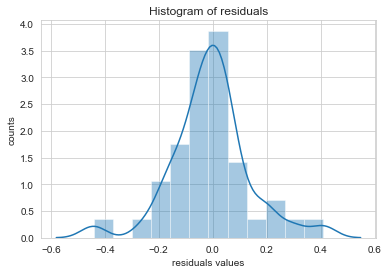

In [44]:
def hist_resids(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('residuals values')
    plt.ylabel('counts')
    
hist_resids(y_test, y_score)

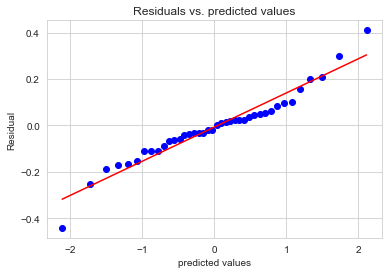

In [45]:
from scipy import stats
def reside_qq(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    stats.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('predicted values')
    plt.ylabel('Residual')
    
reside_qq(y_test, y_score)

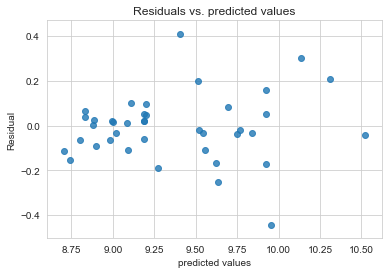

In [46]:
def resid_plot(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('predicted values')
    plt.ylabel('Residual')
    
resid_plot(y_test, y_score)

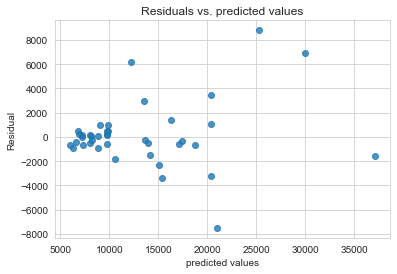

In [51]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform)